This notebook is for snapping of substations to lines

In [31]:
import os
import matplotlib.pyplot as plt 
import geopandas as gpd
import geoplot
import pandas as pd
import numpy as np
import pandas as pd
import hvplot.pandas

import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa
Had to go 0 folder(s) up.


# Africa shape data

In [32]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world.query('continent == "Africa"')
nigeriaplot = world.query('name == "Nigeria"')
#world

# Power data

In [33]:
# choose the option to get your plot
#option = 'raw'
#option = 'clean'
option = 'line2network'


if option=='raw':
    pathg = os.path.realpath("data/raw")+'/africa_all_raw_generators.geojson'
    paths = os.path.realpath("data/raw")+'/africa_all_raw_substations.geojson'
    pathl = os.path.realpath("data/raw")+'/africa_all_raw_lines.geojson'
    
    generators = gpd.read_file(pathg).set_crs(epsg=4326, inplace=True)
    substations = gpd.read_file(paths).set_crs(epsg=4326, inplace=True)
    lines = gpd.read_file(pathl).set_crs(epsg=4326, inplace=True)
    
if option=='clean':   
    pathg = os.path.realpath("data/clean")+'/africa_all_generators.geojson'
    paths = os.path.realpath("data/clean")+'/africa_all_substations.geojson'
    pathl = os.path.realpath("data/clean")+'/africa_all_lines.geojson'

    generators = gpd.read_file(pathg).set_crs(epsg=4326, inplace=True)
    substations = gpd.read_file(paths).set_crs(epsg=4326, inplace=True)
    lines = gpd.read_file(pathl).set_crs(epsg=4326, inplace=True)
    
if option=='line2network': 
    paths = os.path.realpath("data/base_network")+'/africa_all_buses_build_network.csv'
    pathl = os.path.realpath("data/base_network")+'/africa_all_lines_build_network.csv'

    substations = gpd.read_file(paths, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")
    substations["geometry"] = gpd.points_from_xy(pd.to_numeric(substations.lon, downcast="float"), pd.to_numeric(substations.lat, downcast="float"))
    substations = substations.set_crs(epsg=4326, inplace=True)
    lines = gpd.read_file(pathl, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO").set_crs(epsg=4326, inplace=True)

/home/max/anaconda3/envs/toast/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


# Static plot

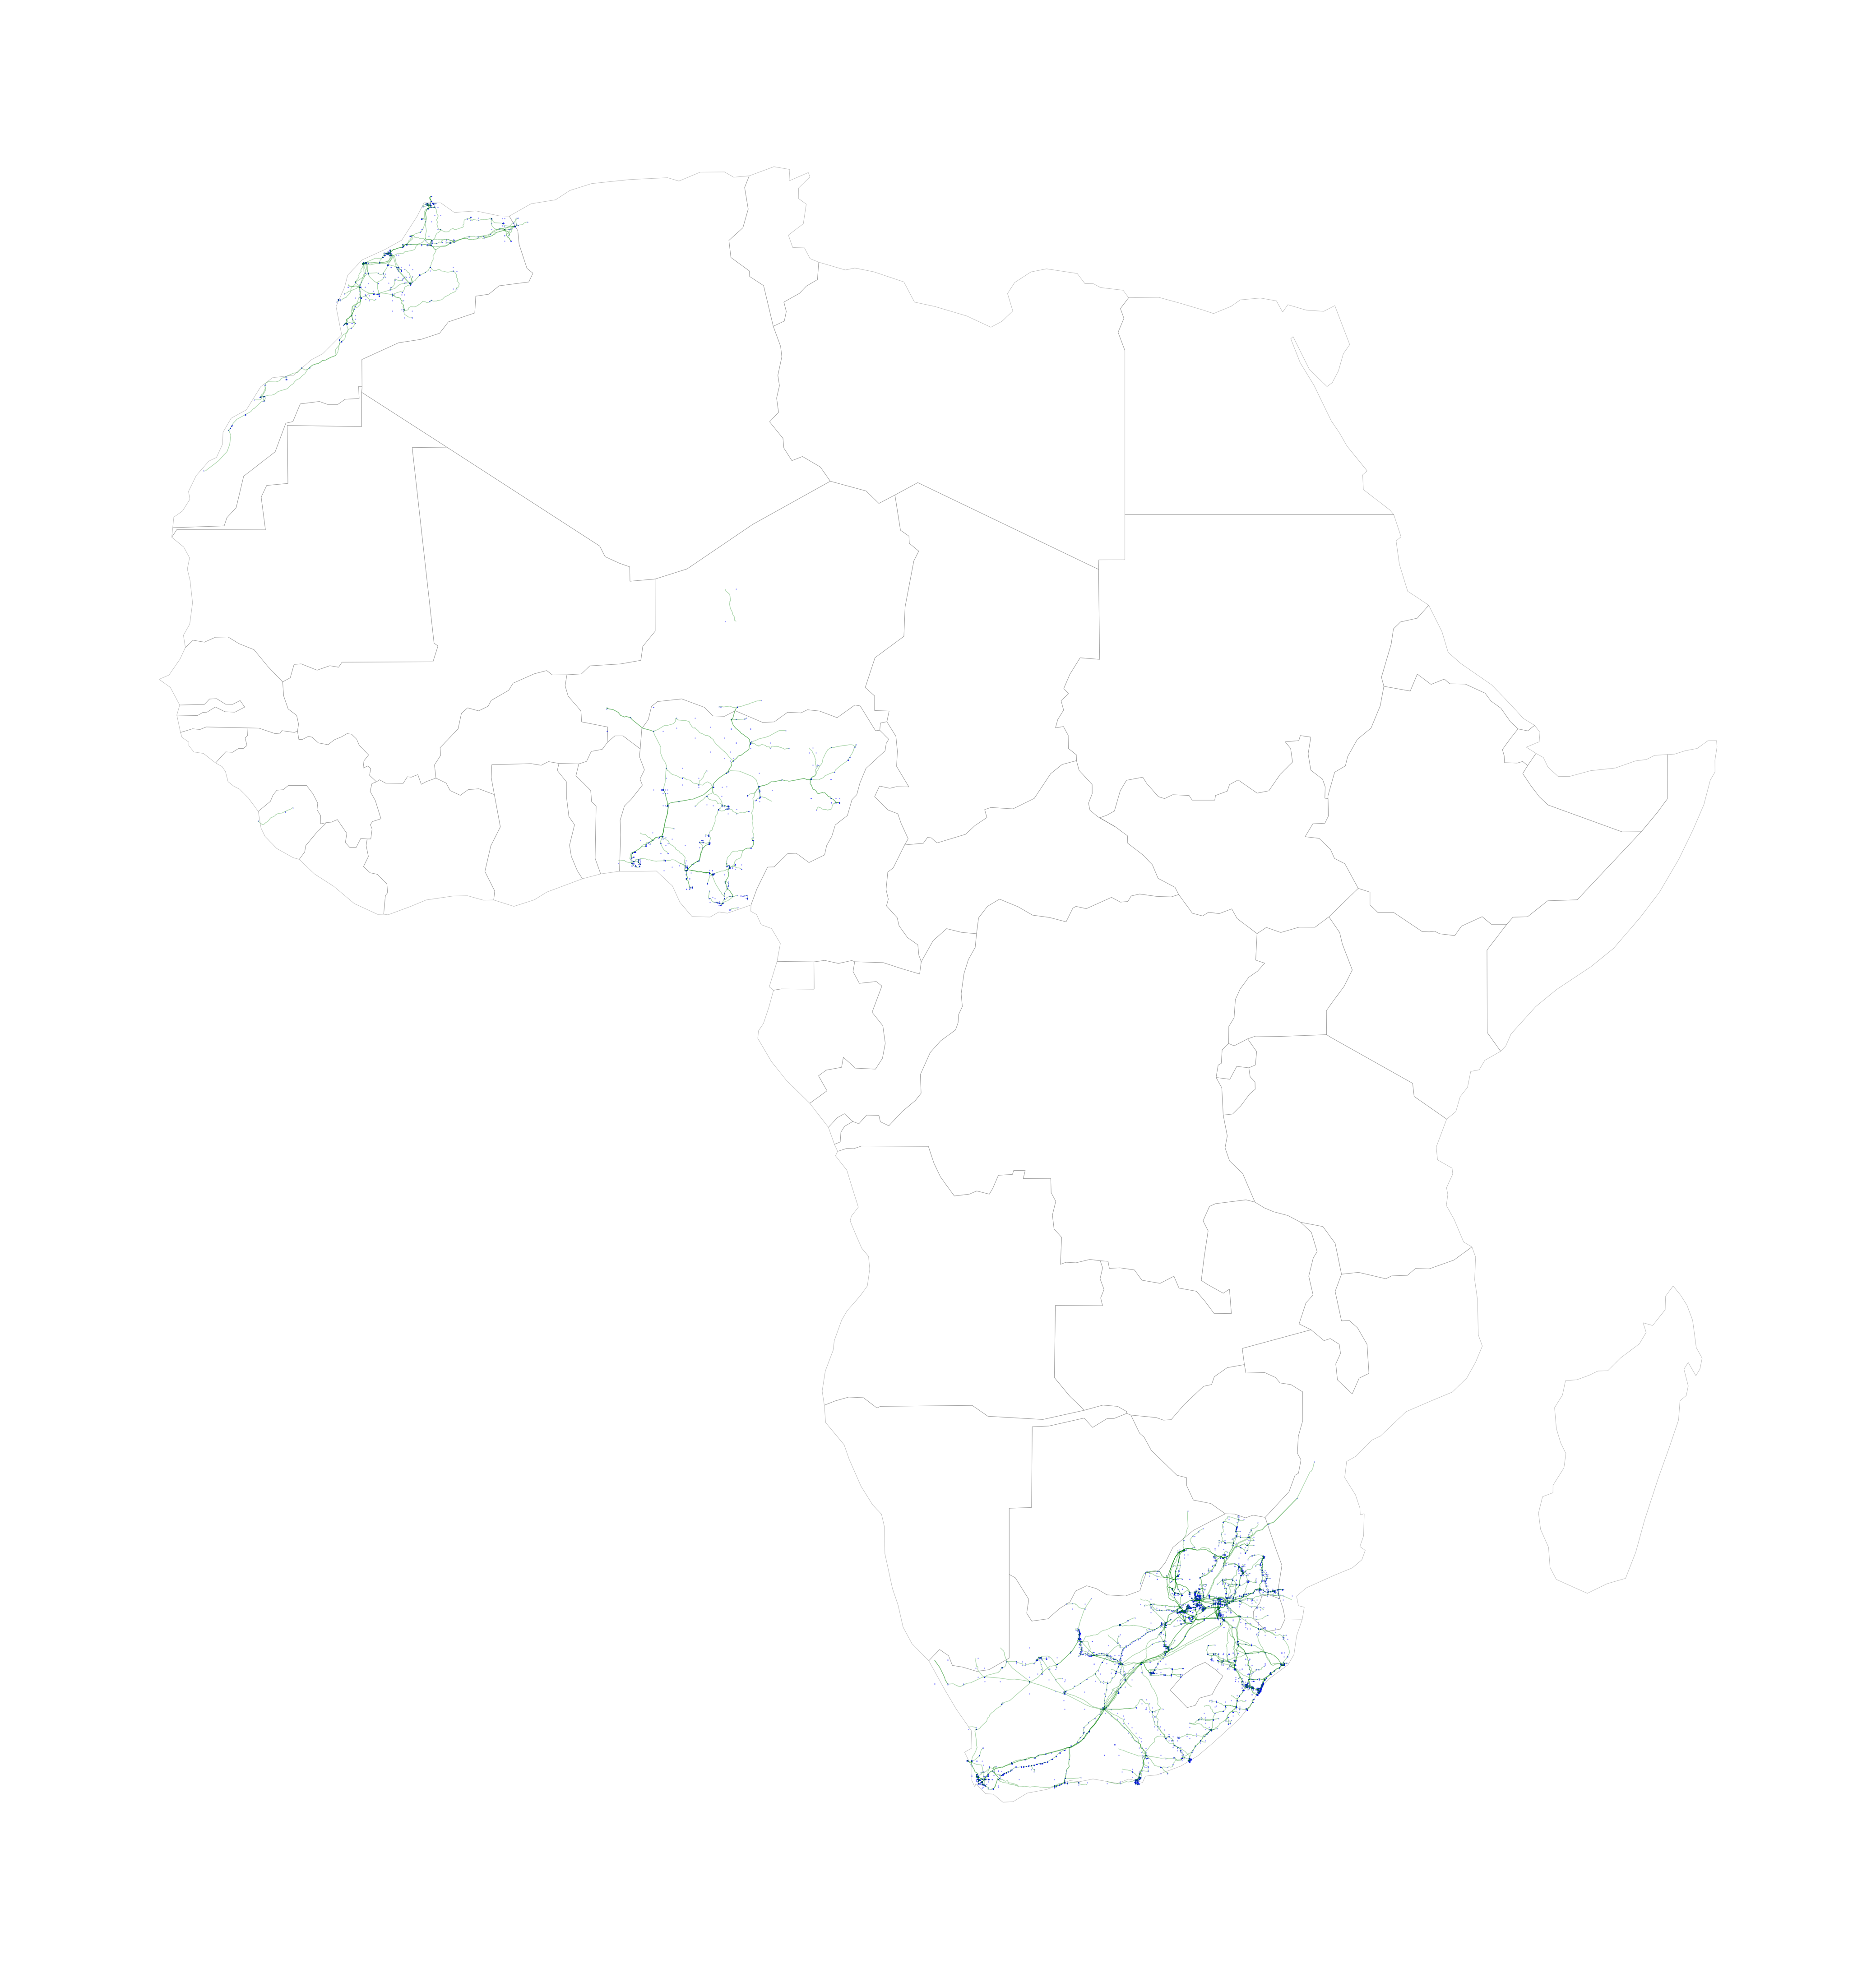

In [34]:
ax = geoplot.polyplot(africa ,edgecolor='grey', alpha = 0.5, figsize=(80, 80))

if option=='line2network':
    lines.plot(figsize=(20, 20),markersize=10, color='green',alpha = 0.3, ax=ax)
    substations.plot(figsize=(20, 20),markersize=3, color='blue',alpha = 0.3, ax=ax)

else:
    generators.plot(figsize=(20, 20),markersize=10, color='orange',alpha = 0.3, ax=ax)
    lines.plot(figsize=(20, 20),markersize=10, color='green',alpha = 0.3, ax=ax)
    substations.plot(figsize=(20, 20),markersize=3, color='blue',alpha = 0.3, ax=ax)

# Example of how to constrain to one country:
# lines.loc[lines['country'] == 'nigeria'].plot(figsize=(20, 20),markersize=25, color='red',alpha = 0.3, ax=ax)

# #plt.savefig('africa_transmission_and substations_110.png')

# Interactive plot

In [35]:
# Choose the country you want to focus
country = "NG"

In [36]:
if option=='line2network':
    lines_ng = lines[lines["country"] == country]
    substations_ng = substations[substations["country"] == country]

else:
    lines_ng = lines[lines["country"] == country]
    substations_ng = substations[substations["country"] == country]
    generators_ng = generators[generators["Country"] == country]

# Map

In [42]:
# Somehow not working with "if"

if option=='line2network':
    substations_ng.hvplot(
        geo=True,
        size = 10,
        frame_height=750,
        alpha=0.4,
        tiles='CartoLight',
        hover_cols=['bus_id'],
        color = 'orange'  
    ) * lines_ng.hvplot(
        geo=True,
        alpha=0.4,
        hover_cols=['line_id']
    ).opts(
        active_tools=['pan', 'wheel_zoom']
    )

else:
    substations_ng.hvplot(
    geo=True,
    size = 10,
    frame_height=750,
    alpha=0.4,
    tiles='CartoLight',
    hover_cols=['bus_id'],
    color = 'orange'  
) * lines_ng.hvplot(
    geo=True,
    alpha=0.4,
    hover_cols=['line_id']
) * generators_ng.hvplot(
    geo=True,
    alpha=0.4,
    color = 'green'
).opts(
    active_tools=['pan', 'wheel_zoom']
)

In [39]:
    substations_ng.hvplot(
        geo=True,
        size = 10,
        frame_height=750,
        alpha=0.4,
        tiles='CartoLight',
        hover_cols=['bus_id'],
        color = 'orange'  
    ) * lines_ng.hvplot(
        geo=True,
        alpha=0.4,
        hover_cols=['line_id']
    ).opts(
        active_tools=['pan', 'wheel_zoom']
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (bus_id)
   .Path.I   :Path   [Longitude,Latitude]   (line_id)